# Step1 Import relevant packages

In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import SGDClassifier as SGD

# Step 2: Load the dataset

In [134]:
data = pd.read_csv('Chinese_MINST_Dataset/chinese_mnist.csv')
data.head()
data.columns = data.columns.str.strip()

In [135]:
data.isnull().sum()

suite_id     0
sample_id    0
code         0
value        0
character    0
dtype: int64

In [136]:
data.shape

(15000, 5)

In [137]:
data['character'].unique().tolist()

['九', '十', '百', '千', '万', '亿', '零', '一', '二', '三', '四', '五', '六', '七', '八']

In [138]:
img_dir = 'Chinese_MINST_Dataset/data/data'
list_of_files = os.listdir(img_dir)
print("Number of images :", len(list_of_files))
print("Example file name<suite_id>_<sample_id>_<code> :", list_of_files[0])

Number of images : 15000
Example file name<suite_id>_<sample_id>_<code> : input_30_9_12.jpg


In [139]:
#add the filename to df
data['filename'] = data[['suite_id', 'sample_id', 'code']].apply(lambda x: 'input_'+x['suite_id'].astype(str)+'_'+x['sample_id'].astype(str)+'_'+x['code'].astype(str)+'.jpg', axis=1)
data.head()

,suite_id,sample_id,code,value,character,filename
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


In [140]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import cv2

In [141]:
def ChineseMINSTLoader(Dataset):
    images = []
    labels = Dataset['code'].values - 1
    for idx, row in Dataset.iterrows():
        img_path = os.path.join(img_dir, row['filename'])
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(image)
    images = np.array(images)
    return images, labels

In [142]:
imagedata, labeldata = ChineseMINSTLoader(data)

9
(64, 64)


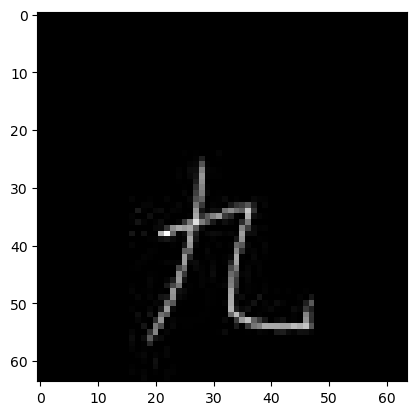

In [143]:
plt.imshow(imagedata[93], cmap='gray')
print(labeldata[93])
print(imagedata[93].shape)

# Step 3: Split and sample the dataset

In [144]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [145]:
train_size = 5000
test_size = 1000
X_train, X_test, y_train, y_test= train_test_split(imagedata, labeldata, train_size=train_size, test_size=test_size, stratify=data['character'])

In [146]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (5000, 64, 64)
Testing set size: (1000, 64, 64)


In [147]:
print("Training class distribution:\n", Counter(y_train))
print("Testing class distribution:\n", Counter(y_test))

Training class distribution:
 Counter({10: 334, 4: 334, 3: 334, 8: 334, 11: 334, 1: 333, 0: 333, 13: 333, 14: 333, 5: 333, 7: 333, 2: 333, 12: 333, 6: 333, 9: 333})
Testing class distribution:
 Counter({7: 67, 13: 67, 2: 67, 6: 67, 9: 67, 1: 67, 5: 67, 0: 67, 14: 67, 12: 67, 10: 66, 4: 66, 3: 66, 8: 66, 11: 66})


# Step 4: Perform necessary data reshaping

In [148]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [149]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (5000, 4096)
X_test shape: (1000, 4096)


# Step 5: Initialise the classifier

In [150]:
knn = KNN(n_neighbors=3, weights="distance")
sgd = SGD(max_iter=250)
dt = DT()

# Step 6: Fit the classifier to the training data

In [151]:
knn.fit(X_train, y_train)
sgd.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 7: Evaluate the trained model on the testing data

In [152]:
from sklearn import metrics

In [153]:
# Make prediction
knn_pred = knn.predict(X_test)
sgd_pred = sgd.predict(X_test)
dt_pred = dt.predict(X_test)

# Step 8: Report the performance of each classifier

In [154]:
# Calculate Accuracy
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
sgd_accuracy = metrics.accuracy_score(y_test, sgd_pred)
dt_accuracy  =  metrics.accuracy_score(y_test, dt_pred)

print(f"KNN accuracy: {knn_accuracy}")
print(f"SGD accuracy: {sgd_accuracy}")
print(f"DT accuracy: {dt_accuracy}")

KNN accuracy: 0.433
SGD accuracy: 0.311
DT accuracy: 0.275


In [155]:
# Calculate Precision
knn_precision = metrics.precision_score(y_test, knn_pred, average='macro')
sgd_precision = metrics.precision_score(y_test, sgd_pred, average='macro')
dt_precision  = metrics.precision_score(y_test, dt_pred, average='macro')

print(f"KNN precision: {knn_precision}")
print(f"SGD precision: {sgd_precision}")
print(f"DT precision: {dt_precision}")

KNN precision: 0.5583388369282332
SGD precision: 0.3233803197653725
DT precision: 0.2712221826596366


In [156]:
# Calculate Recall
knn_recall = metrics.recall_score(y_test, knn_pred, average='macro')
sgd_recall = metrics.recall_score(y_test, sgd_pred, average='macro')
dt_recall = metrics.recall_score(y_test, dt_pred, average='macro')

print(f"KNN recall: {knn_recall}")
print(f"SGD recall: {sgd_recall}")
print(f"DT recall: {dt_recall}")

KNN recall: 0.43337856173677064
SGD recall: 0.31111111111111117
DT recall: 0.2750640735715362


In [157]:
# Calculate F1 score
knn_f1 = metrics.f1_score(y_test, knn_pred, average='macro')
sgd_f1 = metrics.f1_score(y_test, sgd_pred, average='macro')
dt_f1  = metrics.f1_score(y_test, dt_pred, average='macro')

print(f"KNN f1 score: {knn_f1}")
print(f"SGD f1 score: {sgd_f1}")
print(f"DT f1 score: {dt_f1}")

KNN f1 score: 0.441916025971735
SGD f1 score: 0.31139484311449545
DT f1 score: 0.27132468416386213


In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
# Display image
def display(knn, sgd, dt):
    plt.figure(figsize=(15, 10))
    #knn
    plt.subplot(1, 3, 1)
    sns.heatmap(knn, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Label")
    plt.title("KNN Confusion Matrix")
    
    #sgd
    plt.subplot(1, 3, 2)
    sns.heatmap(sgd, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Label")
    plt.title("SGD Confusion Matrix")

     #dt
    plt.subplot(1, 3, 3)
    sns.heatmap(dt, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Label")
    plt.title("DT Confusion Matrix")
    
    plt.show()

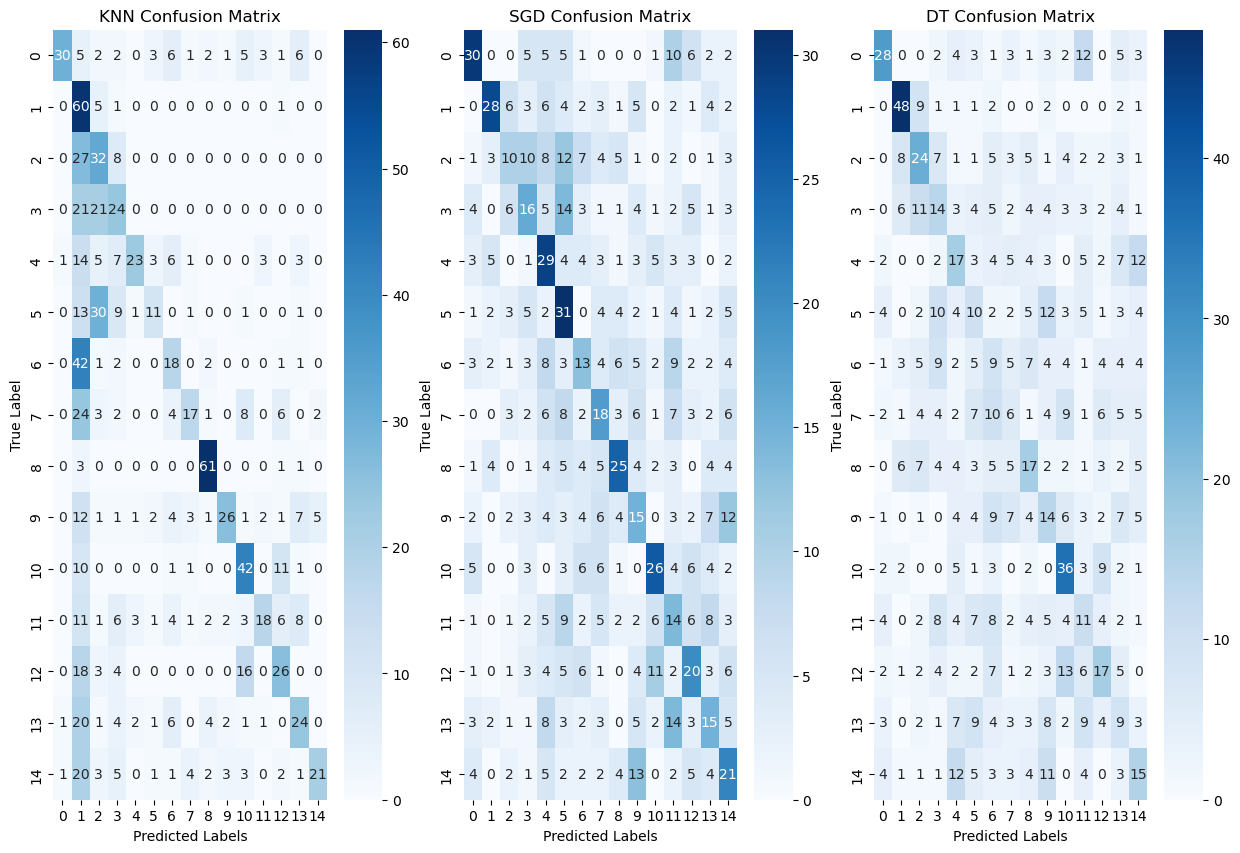

In [160]:
knn_conf = confusion_matrix(y_test, knn_pred)
sgd_conf = confusion_matrix(y_test, sgd_pred)
dt_conf  = confusion_matrix(y_test, dt_pred)

display(knn_conf, sgd_conf, dt_conf)

# Step 3: Split and sample the dataset for double dataset

We can find that after double the train set, the accuracy and other evolution score doesn't improve too much.  

In [161]:
train_size = 10000
X_train, X_test, y_train, y_test= train_test_split(imagedata, labeldata, train_size=train_size, test_size=test_size, stratify=data['character'])

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

Training set size: (10000, 64, 64)
Testing set size: (1000, 64, 64)


In [162]:
knn.fit(X_train, y_train)
sgd.fit(X_train, y_train)
dt.fit(X_train, y_train)
# Make prediction
knn_pred = knn.predict(X_test)
sgd_pred = sgd.predict(X_test)
dt_pred = dt.predict(X_test)

In [163]:
# Calculate Accuracy
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
sgd_accuracy = metrics.accuracy_score(y_test, sgd_pred)
dt_accuracy  =  metrics.accuracy_score(y_test, dt_pred)

print(f"KNN accuracy: {knn_accuracy}")
print(f"SGD accuracy: {sgd_accuracy}")
print(f"DT accuracy: {dt_accuracy}")

KNN accuracy: 0.452
SGD accuracy: 0.308
DT accuracy: 0.316


In [164]:
# Calculate Precision
knn_precision = metrics.precision_score(y_test, knn_pred, average='macro')
sgd_precision = metrics.precision_score(y_test, sgd_pred, average='macro')
dt_precision  = metrics.precision_score(y_test, dt_pred, average='macro')

print(f"KNN precision: {knn_precision}")
print(f"SGD precision: {sgd_precision}")

KNN precision: 0.5688339929977125
SGD precision: 0.3394335916340248


In [165]:
# Calculate Recall
knn_recall = metrics.recall_score(y_test, knn_pred, average='macro')
sgd_recall = metrics.recall_score(y_test, sgd_pred, average='macro')
dt_recall = metrics.recall_score(y_test, dt_pred, average='macro')

print(f"KNN recall: {knn_recall}")
print(f"SGD recall: {sgd_recall}")
print(f"DT recall: {dt_recall}")

KNN recall: 0.4514699231117142
SGD recall: 0.3079149706015377
DT recall: 0.31564902758932606


In [166]:
# Calculate F1 score
knn_f1 = metrics.f1_score(y_test, knn_pred, average='macro')
sgd_f1 = metrics.f1_score(y_test, sgd_pred, average='macro')
dt_f1  = metrics.f1_score(y_test, dt_pred, average='macro')

print(f"KNN f1 score: {knn_f1}")
print(f"SGD f1 score: {sgd_f1}")
print(f"DT f1 score: {dt_f1}")

KNN f1 score: 0.45683811650337136
SGD f1 score: 0.31436107959924614
DT f1 score: 0.31421274508541525


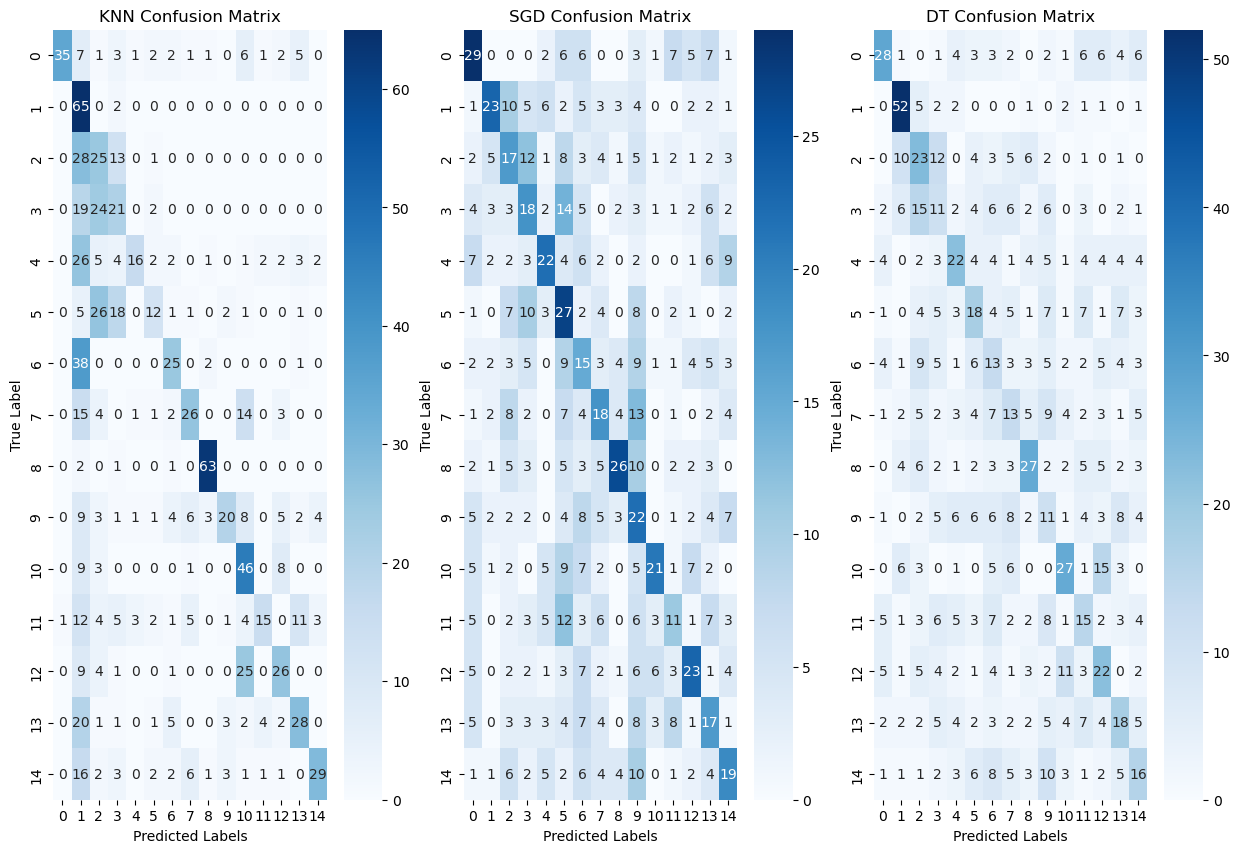

In [167]:
knn_conf = confusion_matrix(y_test, knn_pred)
sgd_conf = confusion_matrix(y_test, sgd_pred)
dt_conf  = confusion_matrix(y_test, dt_pred)

display(knn_conf, sgd_conf, dt_conf)